In [60]:
import networkx as nx
import generator as gen
import simulate as sim
import conComp as cc
import random
import numpy as np
import mainMethods as mn
import matplotlib.pyplot as plt

In [2]:
def plot_d(g,cmat,rounds=500):
    ccomp = cc.Components(g)
    dist = []
    weights = []
    for i in range(rounds):
        g, cmat, ccomp, d, w = sim.sim_one_iter(g,cmat,ccomp,False)
        
        dist.append(d)
        weights.append(w)
    
    return g, cmat, ccomp, dist, weights

Still getting zero division errors in edge update method...
- means edge weights asymptotically approaching 1
possible reasons:
- trucating change values at 0 and 1
- natural homophily of the process (SBM checked) 
debug:
- try plotting edge weights
- try starting with e-r model

In [58]:
def generate():
    g_init = gen.graph_gen(2,50,0.2,0.02)
    dev = [0.1] + [0.5] + [0.5] * 2
    std_devs = [dev, dev]
    changeVec = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
    cmat = gen.culture_init(g_init, std_devs, changeVec)
    #g, culturemat = sim.simulate_iterstop(g_init,cmat)
    #print(nx.average_shortest_path_length(g))
    w_init = [w for u,v,w in g_init.edges.data('weight')]
    plt.scatter(list(range(len(w_init))),w_init)
    
    return g_init,cmat

In [41]:
g, cmat, ccomp, dist, weights = plot_d(g_init,cmat,rounds=500)

In [42]:
len(weights)

500

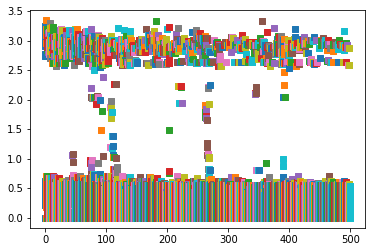

In [43]:
x = list(range(500))
for xe, ye in zip(x, dist):
    plt.scatter([xe] * len(ye), ye, marker=",")
plt.show()

In [44]:
def plot_hist(weights, num_bins=50):
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(weights, num_bins, density=1)
    plt.show()

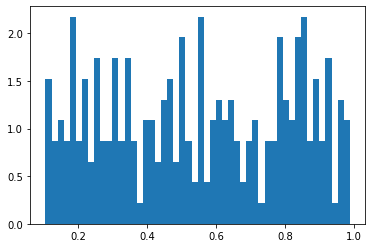

In [45]:
plot_hist(w_init)

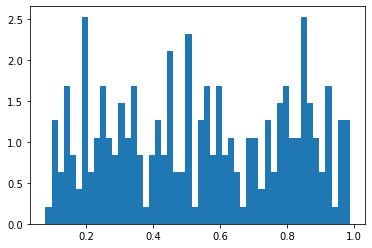

In [46]:
plot_hist(weights[0])

Many successful interactions in a row leading to edge weight of 1

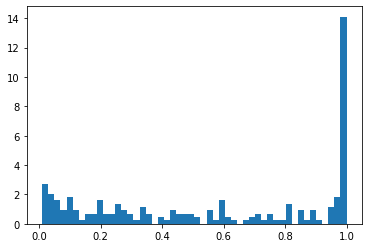

In [47]:
plot_hist(weights[100])

sigmoid and logit functions working as expected:

2.8394633615601155


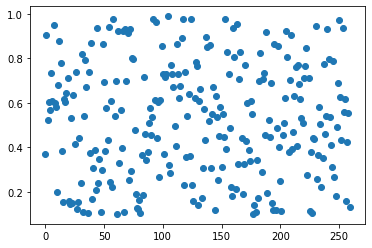

In [65]:
g_init,cmat = generate()
g, cmat, ccomp, dist, weights = plot_d(g_init,cmat,rounds=500)
print(mn.culture_distance(g,cmat,False,2))

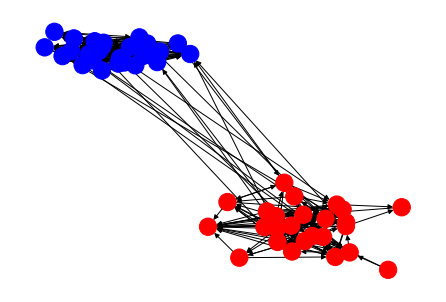

In [66]:
#plot graph getting more assortative as iters go on. no show of increased edge count between groups. 
#even with high culture tolerance nodes... 
#check high culture tolerance nodes and acceptance function. check ccomp functionality
#cultural tolerance not bounded from above???
#edge weight change also not bounded from above???
#with proportional edge decision, getting assortativity
#how to deal with disconnected graphs? if one node, then take data for connected part
colors = ['blue' if b==0 else 'red' for v,b in g.nodes(data='block')]
    
nx.draw(g, node_color=colors)

In [39]:
gundir = nx.DiGraph.to_undirected(g)
list(nx.algorithms.components.connected_components(gundir))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49},
 {46}]

In [14]:
w = [g.edges[v,0]['weight'] for v in list(g.predecessors(0))]

In [15]:
w

[0.9999522292964567,
 0.9804038195131217,
 0.9536939524473398,
 0.9965524493188577,
 0.9999991627402622,
 0.9995961441578064,
 0.9073164995424106,
 0.9999825800606891]

In [16]:
g.edges[17,0]['weight']

0.9995961441578064

In [17]:
fail = 0
for i in range(10 **4):
    g_init = gen.graph_gen(2,50,0.2,0.02)
    if not nx.is_weakly_connected(g_init):
        fail += 1
print(fail)

6
